In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


# Data Preperation

In [2]:
# Read the 2 tables
athletes = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

In [3]:
# Merge the 2 dataframes
df = pd.merge(athletes,region, how='left', on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [4]:
# Check data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [5]:
# Drop column notes
df.drop(columns=['notes'], inplace=True)

In [6]:
# Rename some columns and make the columns lowercase
df.rename(columns={'region': 'country', 'Sex':'gender'}, inplace=True)
df.columns = df.columns.str.lower()

In [7]:
# Change the values of the gender column to be readable 
df['gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)

In [8]:
# Check for duplicated values 
df.duplicated().sum()

1385

In [9]:
# Drop duplicated values in the dataset
df.drop_duplicates(inplace=True)

In [10]:
# Check the null values in every column
df.isnull().sum()

id              0
name            0
gender          0
age          9315
height      58814
weight      61527
team            0
noc             0
games           0
year            0
season          0
city            0
sport           0
event           0
medal      229959
country       370
dtype: int64

We have 5 columns have null values,we will replace the null values in the medal columns with 0, because it means here that the athletes didn't won any medal.
country, we will explore it now, and for height, weight, age we will keep them.

In [195]:
df['medal'] = df['medal'].fillna("Medal Not Won")

In [196]:
df['medal'].value_counts()

medal
0         229959
Gold       13369
Bronze     13295
Silver     13108
Name: count, dtype: int64

We replaced the null values with the zeros

In [19]:
null_countries = df[df['country'].isnull()]
null_countries.head()

,id,name,gender,age,height,weight,team,noc,games,year,season,city,sport,event,medal,country
578,332,Zarinah Abdullah,Female,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,0,NaN
579,332,Zarinah Abdullah,Female,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,0,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,Female,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,0,NaN
6267,3515,Paulo Amotun Lokoro,Male,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",0,NaN
7659,4264,Ang Peng Siong,Male,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,0,NaN


we can see that most of the null values in the country has the `Singapore` team name and `SGP` as NOC

In [20]:
null_countries['team'].value_counts()

team
Singapore                   338
Refugee Olympic Athletes     12
Tuvalu                        7
Rika II                       4
June Climene                  3
Unknown                       2
Singapore-2                   2
Singapore-1                   2
Name: count, dtype: int64

In [21]:
null_countries['noc'].value_counts()

noc
SGP    349
ROT     12
TUV      7
UNK      2
Name: count, dtype: int64

In [22]:
# Replace null values in 'Country' with 'Singapore' where 'NOC' is 'SGP'
df.loc[(df['noc'] =='SGP') & (df['country'].isnull()), 'country'] = 'Singapore'

In [23]:
# Replace null values in 'Country' with 'Tuvalu' where 'NOC' is 'TUV'
df.loc[(df['noc'] =='TUV') & (df['country'].isnull()) , 'country'] = 'Tuvalu'

The other players mostly from South Sudan, Syria and some african countries. 

# Analysis 

We will start analysis with number of athletes, countries and events over the time.

## 1- Number of athletes, countries, sports and events during years


In [65]:
athletes_countries = df.groupby(['year','season']).agg({'id':'count', 'country': 'nunique', 'event': 'nunique', 'sport':'nunique'}).reset_index()
athletes_countries.head()

,year,season,id,country,event,sport
0,1896,Summer,380,12,43,9
1,1900,Summer,1898,31,90,20
2,1904,Summer,1301,14,95,18
3,1906,Summer,1733,20,74,13
4,1908,Summer,3069,22,109,24


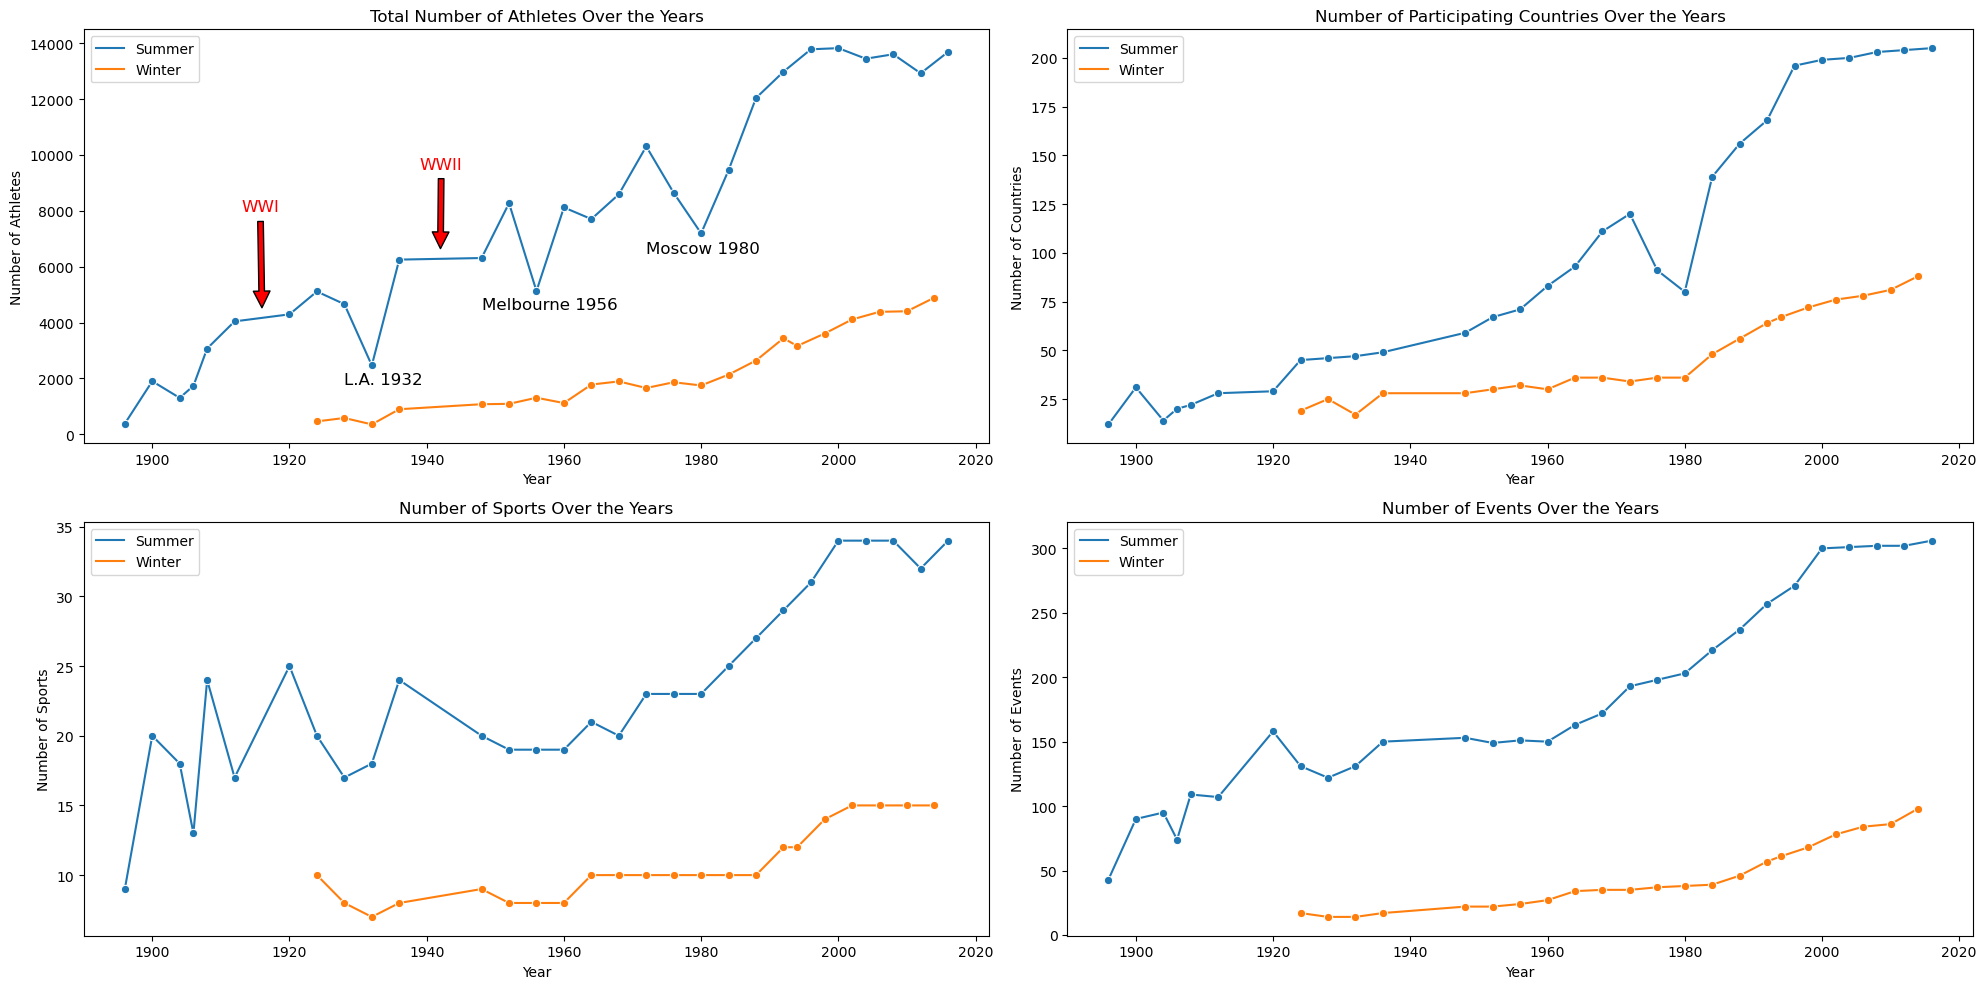

In [156]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2,2, figsize=[20,10])

# Plotting the total number of athletes (ID count)
sns.lineplot(ax=axs[0,0], data=athletes_countries, x ='year', y ='id', hue='season', marker='o')
axs[0, 0].set_title('Total Number of Athletes Over the Years')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Athletes')
# Annotate with historical events
axs[0, 0].annotate('WWI',
                 xy=(1916, 4350),
                 xytext=(1913, 8000),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=12, color='red')
axs[0, 0].annotate('WWII',
                 xy=(1942, 6500),
                 xytext=(1939, 9500),
                 arrowprops=dict(facecolor='red', shrink=0.05),
                 fontsize=12, color='red')
axs[0,0].annotate('L.A. 1932',
                  xy=(1925,2000),
                  xytext=(1928,1800),
                  fontsize=12,color='black')
axs[0,0].annotate('Melbourne 1956',
                  xy=(1956,2000),
                  xytext=(1948,4500),
                  fontsize=12,color='black')
axs[0,0].annotate('Moscow 1980',
                  xy=(1980,2000),
                  xytext=(1972,6500),
                  fontsize=12,color='black')
axs[0,0].legend()

# Plotting the number of unique countries
sns.lineplot(ax=axs[0,1], data=athletes_countries, x='year', y='country', hue='season', marker='o')
axs[0, 1].set_title('Number of Participating Countries Over the Years')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Number of Countries')
axs[0, 1].legend()

# Plotting the number of unique sports
sns.lineplot(ax=axs[1,0], data=athletes_countries, x='year', y='sport', hue='season', marker='o')
axs[1, 0].set_title('Number of Sports Over the Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of Sports')
axs[1, 0].legend()

# Plotting the number of unique events
sns.lineplot(ax=axs[1,1], data=athletes_countries, x='year', y='event', hue='season', marker='o')
axs[1, 1].set_title('Number of Events Over the Years')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Events')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

<h3 style="color:#1b5e20; margin-bottom:10px;">Impact of Historical Events on the Olympic Games</h3>
<div style="background-color:#e0f7da; color:#1b5e20; padding:15px; border-radius:5px; margin-bottom:15px; border: 1px solid #a5d6a7;">
    After analyzing the data, it’s clear that several historical events significantly impacted the Olympic Games. The Olympics are traditionally held every four years, but there was an exception in 1906 when the Intercalated Games were organized in Athens. These were intended to be a celebration marking the 10th anniversary of the modern Olympics, but they are not officially recognized as part of the Olympic Games. 
    The 1916 Olympics were canceled due to World War I, and the Games were paused from 1936 to 1948 because of World War II.
    We also observed a notable decrease in the number of athletes during three specific Olympics:
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>• Los Angeles 1932:</strong> The Great Depression had a significant impact, and the political tensions were heightened by hosting both the Winter and Summer Olympics in the same country.</li>
        <li><strong>• Melbourne 1956:</strong> The Suez Crisis and the Hungarian Revolution led to political boycotts and a reduced number of participating athletes.</li>
        <li><strong>• Moscow 1980:</strong> The Soviet invasion of Afghanistan resulted in a widespread boycott, further decreasing the number of athletes.</li>
    </ul>
    These events illustrate how global political and economic factors can profoundly influence the Olympic Games.
</div>

In [197]:
# Exclude data for the year 1906 as the 1906 Olympics were unofficial and not recognized by the IOC
df = df[df['year'] !=1906]

<h3 style="color:#1b5e20; margin-bottom:10px;">Trends in Olympic Participation Over Time</h3>
<div style="background-color:#e0f7da; color:#1b5e20; padding:15px; border-radius:5px; margin-bottom:15px; border: 1px solid #a5d6a7;">
    Based on the analysis, we observe a general trend of increasing participation by countries in the Olympics over time. However, in 1900, there was an unusually high number of participating countries, more than in the subsequent years. After that, the number of countries decreased until 1924, when it began to rise again due to the introduction of more structured rules and better organization of the Games.
</div>

<h3 style="color:#1b5e20; margin-bottom:10px;">Evolution of Olympic Sports Over Time</h3>
<div style="background-color:#e8f5e9; color:#2e7d32; padding:15px; border-radius:5px; margin-bottom:15px; border: 1px solid #a5d6a7;">
    <p>Based on the analysis, we can observe that the early Olympics featured a wide variety of sports. Over time, some of these sports were removed, and new ones were added, reflecting the evolving nature of the Games.</p>
</div>

### Sports in Summer and Winter Olympics

In [434]:
# Number of summer and winter editions 
number_summer_editions = df[df['season'] == 'Summer']['year'].nunique()
number_winter_editions = df[df['season'] == 'Winter']['year'].nunique()
print(f"Number of Summer Editions: {number_summer_editions}, and Winter Editions: {number_winter_editions}")


Number of Summer Editions: 28, and Winter Editions: 22


In [368]:
# Group by sport and calculate the first year, last year, and number of unique years
time_of_sport = df.groupby(['sport','season']).agg(
    first_year=('year', 'min'),
    last_year=('year', 'max'),
    num_olympics=('year', 'nunique')
).reset_index()

time_of_sport

,sport,season,first_year,last_year,num_olympics
0,Aeronautics,Summer,1936,1936,1
1,Alpine Skiing,Winter,1936,2014,19
2,Alpinism,Summer,1932,1936,2
3,Alpinism,Winter,1924,1924,1
4,Archery,Summer,1900,2016,16
...,...,...,...,...,...
64,Tug-Of-War,Summer,1900,1920,5
65,Volleyball,Summer,1964,2016,14
66,Water Polo,Summer,1900,2016,27
67,Weightlifting,Summer,1896,2016,25


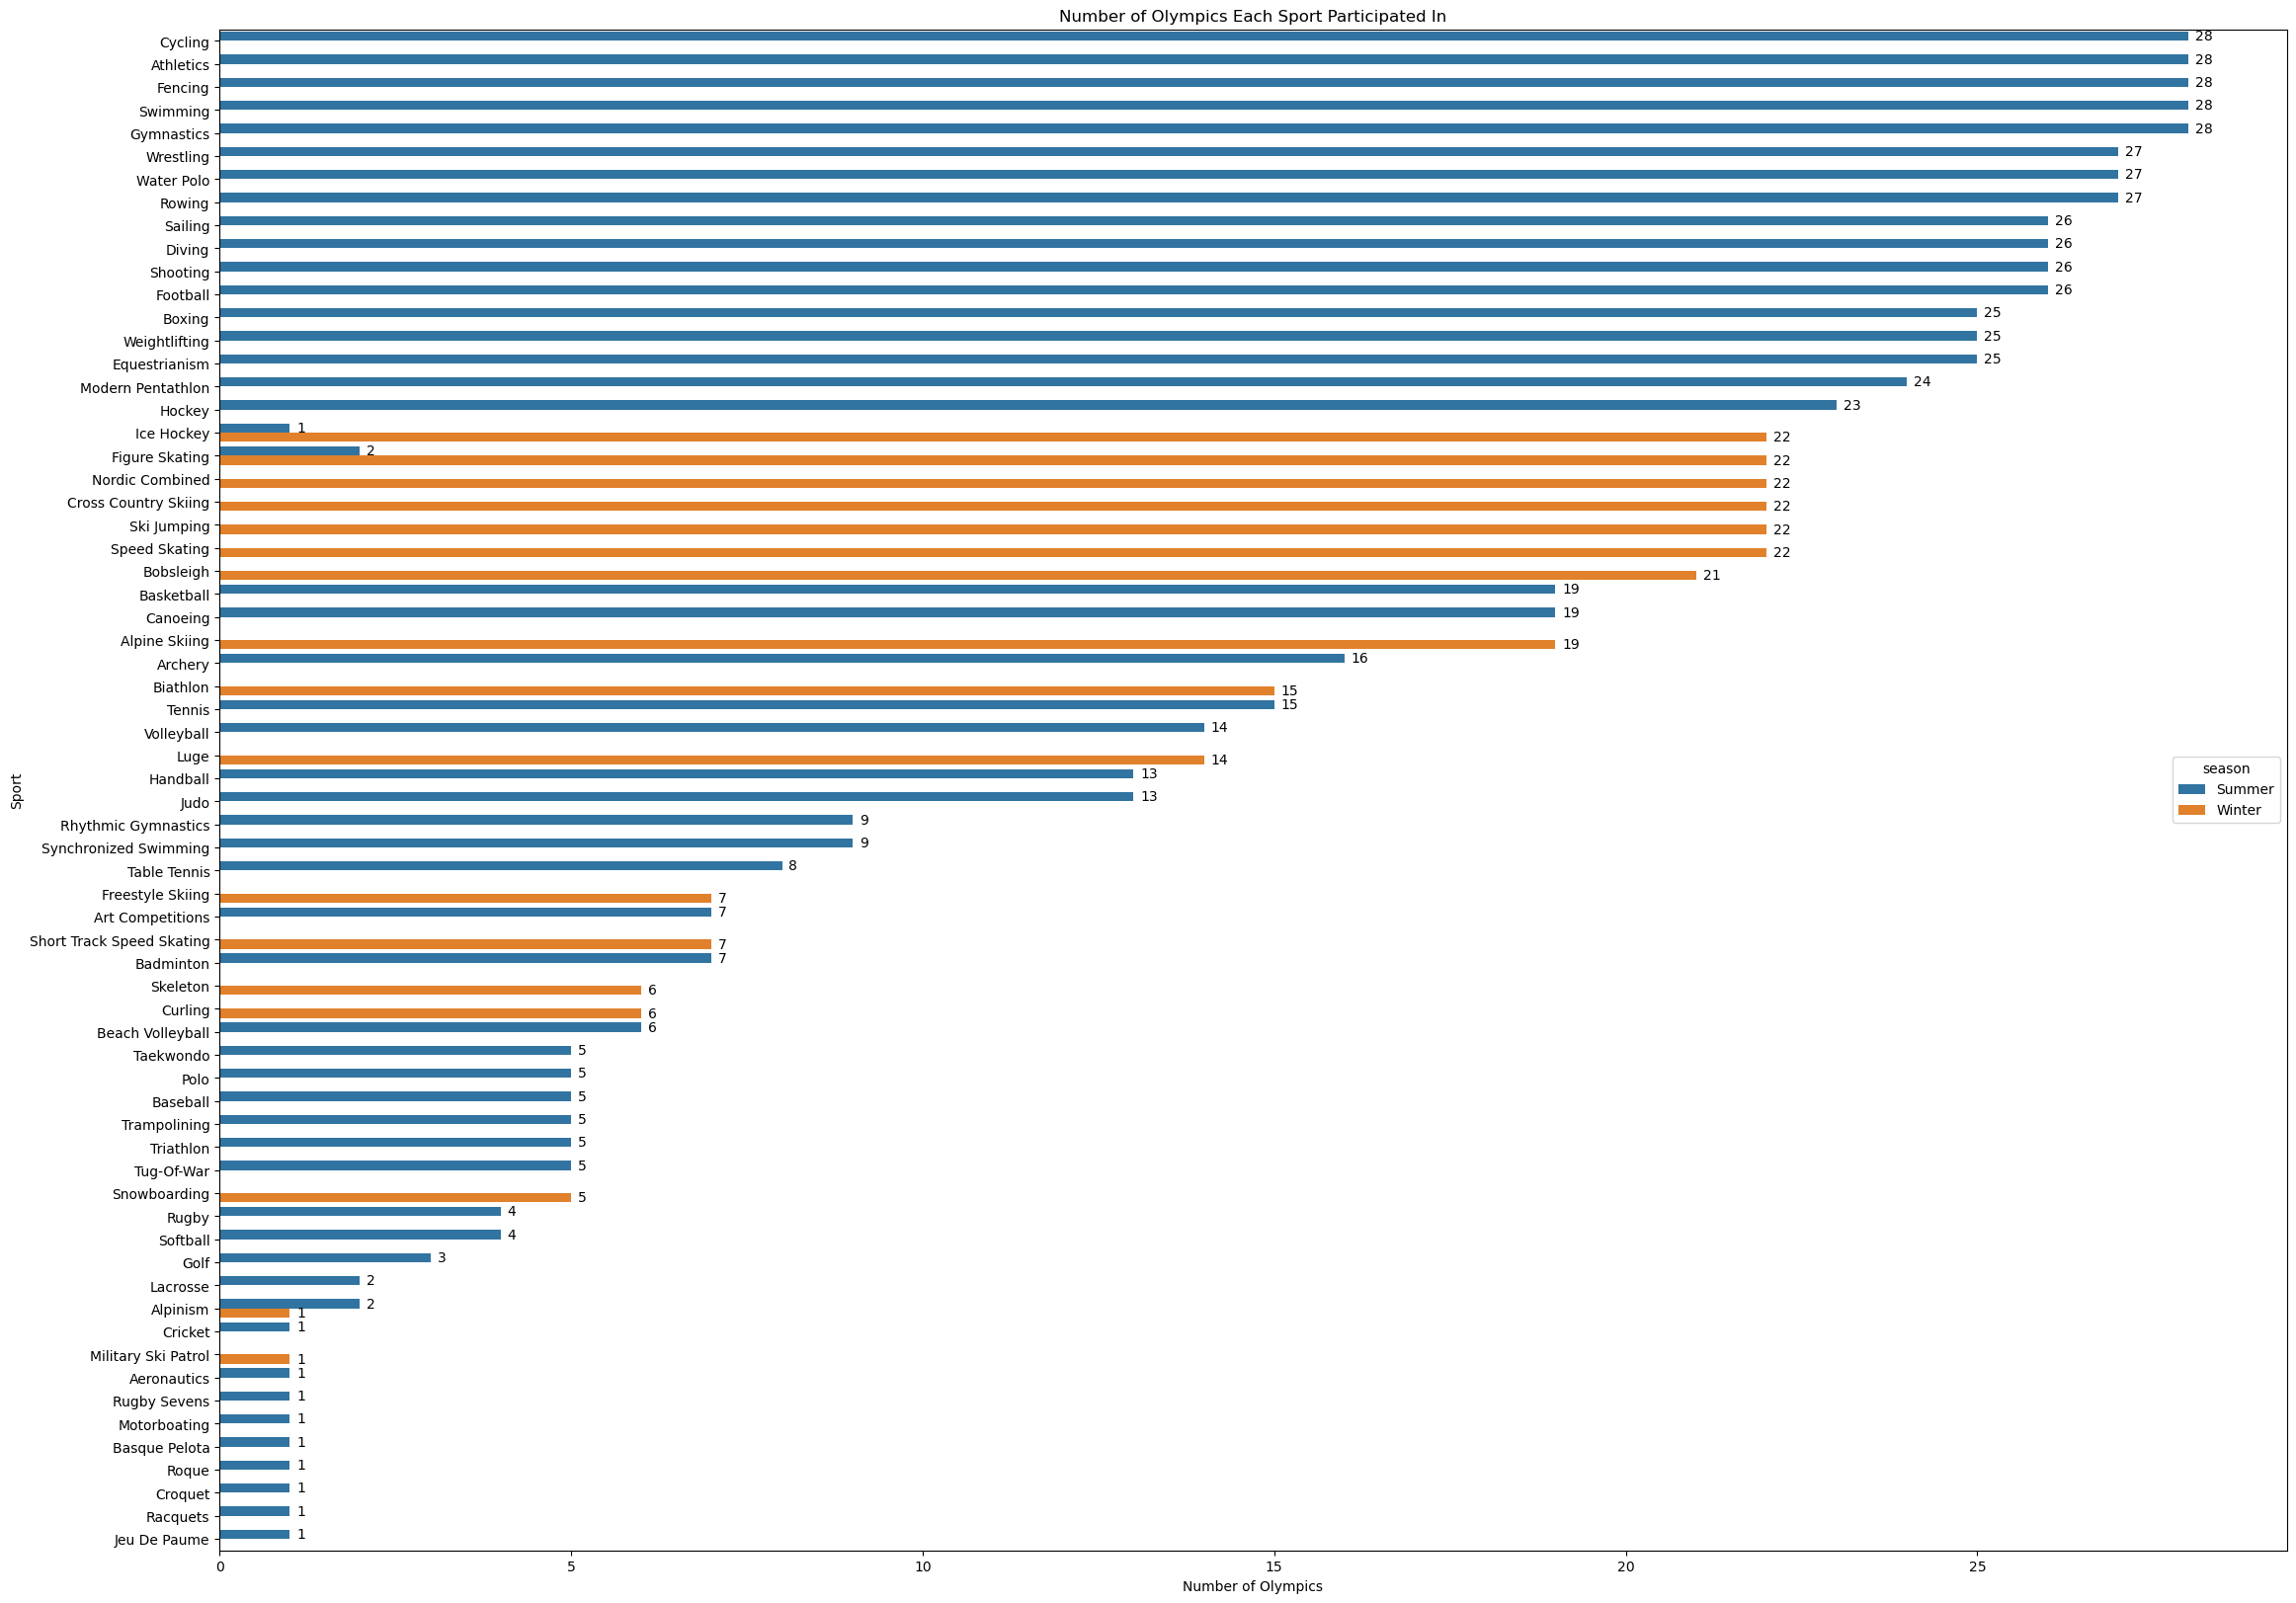

In [367]:
plt.figure(figsize=(27, 20))

# Sort the DataFrame by 'num_olympics' in descending order
time_of_sport_arranged = time_of_sport.sort_values(by='num_olympics', ascending=False)

# Create the barplot
ax = sns.barplot(data=time_of_sport_arranged, y='sport', x='num_olympics', hue='season')

# Annotate each bar with the number of Olympics
for p in ax.patches:
    width = p.get_width()
    if not pd.isna(width):  # Check if width is not NaN
        ax.annotate(f'{int(width)}', 
                    (width, p.get_y() + p.get_height() / 2), 
                    ha='left', 
                    va='center', 
                    xytext=(5, 0), 
                    textcoords='offset points')

# Set labels and title for clarity
ax.set_ylabel('Sport')
ax.set_xlabel('Number of Olympics')
ax.set_title('Number of Olympics Each Sport Participated In')

plt.show()

### core sports 

<div style="background-color:#e0f7da; color:#1b5e20; padding:15px; border-radius:5px; margin-bottom:15px; border: 1px solid #a5d6a7;">
    Based on the analysis of the Olympics through 2016, there have been 28 Summer Olympics and 22 Winter Olympics. We can identify five core sports that have been part of the Summer Olympics since the beginning, and six core sports in the Winter Olympics.
    <ul style="list-style-type: none; padding-left: 0;">
        <li><strong>• In the Summer Olympics:</li>
        <ul style="list-style-type: none; padding-left: 20px;">
            <li>Cycling</li>
            <li>Swimming</li>
            <li>Gymnastics</li>
            <li>Athletics</li>
            <li>Fencing</li>
        </ul>
        <li><strong>• In the Winter Olympics:</li>
        <ul style="list-style-type: none; padding-left: 20px;">
            <li>Speed Skating</li>
            <li>Ski Jumping</li>
            <li>Cross Country Skiing</li>
            <li>Ice Hockey</li>
            <li>Nordic Combined</li>
            <li>Figure Skating</li>
        </ul>
    </ul>
</div>

### Sports had been removed from summer olympics / winter olympics

In [423]:
# Sports had been in olympics for 8 or less editions Summer editions
removed_sports_summer=(time_of_sport[(time_of_sport['num_olympics'] <= 8) &
                (time_of_sport['last_year'] != 2016) &
                (time_of_sport['season'] == 'Summer')]
                .sort_values(by='num_olympics'))
removed_sports_summer

,sport,season,first_year,last_year,num_olympics
0,Aeronautics,Summer,1936,1936,1
45,Roque,Summer,1904,1904,1
43,Racquets,Summer,1908,1908,1
40,Motorboating,Summer,1908,1908,1
34,Jeu De Paume,Summer,1908,1908,1
17,Croquet,Summer,1900,1900,1
32,Ice Hockey,Summer,1920,1920,1
10,Basque Pelota,Summer,1900,1900,1
16,Cricket,Summer,1900,1900,1
24,Figure Skating,Summer,1908,1920,2


In [433]:
# Sports had been in olympics for 8 or less editions Winter editions 
removed_sports_winter=(time_of_sport[(time_of_sport['num_olympics'] <= 8) &
                (time_of_sport['last_year'] != 2014) &
                (time_of_sport['season'] == 'Winter')]
                .sort_values(by='num_olympics'))
removed_sports_winter

,sport,season,first_year,last_year,num_olympics
3,Alpinism,Winter,1924,1924,1
38,Military Ski Patrol,Winter,1924,1924,1


<div style="background-color:#e0f7da; color:#1b5e20; padding:15px; border-radius:5px; margin-bottom:15px; border: 1px solid #a5d6a7;">
    Based on the analysis, I found that several sports were featured in the Olympics for a limited number of editions (from 1 to 7) before being removed. Here are the sports that were part of the Summer Olympics:
    <ul style="list-style-type: none; padding-left: 0;">
        <li>• Aeronautics</li>
        <li>• Roque</li>
        <li>• Racquets</li>
        <li>• Motorboating</li>
        <li>• Jeu De Paume</li>
        <li>• Croquet</li>
        <li>• Ice Hockey (Moved to Winter Olympic)</li> 
        <li>• Basque Pelota</li>
        <li>• Cricket</li>
        <li>• Figure Skating</li>
        <li>• Lacrosse</li>
        <li>• Alpinism</li>
        <li>• Softball</li>
        <li>• Rugby</li>
        <li>• Baseball</li>
        <li>• Polo</li>
        <li>• Tug-Of-War</li>
        <li>• Art Competitions</li>
    </ul>
    For the Winter Olympics, there are two sports that fit this criterion:
    <ul style="list-style-type: none; padding-left: 0;">
        <li>• Alpinism</li>
        <li>• Military Ski Patrol</li>
    </ul>
</div>

### Sports in both Summer and Winter

In [430]:
# filter for summer sports
summer_sports = time_of_sport[time_of_sport['season'] == 'Summer']

,sport,season,first_year,last_year,num_olympics
56,Speed Skating,Winter,1924,2014,22
53,Ski Jumping,Winter,1924,2014,22
18,Cross Country Skiing,Winter,1924,2014,22
33,Ice Hockey,Winter,1924,2014,22
41,Nordic Combined,Winter,1924,2014,22


In [ ]:
# filter for winter sports 
winter_sports = time_of_sport[time_of_sport['season'] == 'Winter']

In [428]:
sports_in_both = set(summer_sports['sport']).intersection(set(winter_sports['sport']))
sports_in_both

{'Alpinism', 'Figure Skating', 'Ice Hockey'}

<div style="background-color:#e0f7da; color:#1b5e20; padding:15px; border-radius:5px; margin-bottom:15px; border: 1px solid #a5d6a7;">
    Alpinism was indeed part of the Olympic events but only in a special context:
    <ul style="list-style-type: none; padding-left: 0;">
        <li>• <strong>Summer Olympics:</strong></li>
        <ul style="list-style-type: none; padding-left: 20px;">
            <li>1932: It was part of the art competitions, not the sports events.</li>
            <li>1936: Again, it was included in the art competitions.</li>
        </ul>
        <li>• <strong>Winter Olympics:</strong></li>
        <ul style="list-style-type: none; padding-left: 20px;">
            <li>1924: Alpinism was featured as part of the Winter Olympics but was not considered a competitive sport.</li>
        </ul>
    </ul>
    <p>In summary, Alpinism appeared in the Summer Olympics in 1932 and 1936 as an art competition and in the Winter Olympics in 1924. However, as an art competition, it did not have the same competitive status as other sports and should be treated differently in your analysis.</p>
</div>

In [324]:
skating_in_olympics = time_of_sport[time_of_sport['sport'] == 'Figure Skating']
skating_in_olympics

,sport,season,first_year,last_year,num_olympics
25,Figure Skating,Winter,1924,2014,22
24,Figure Skating,Summer,1908,1920,2


In [323]:
ice_hockey_in_olympics = time_of_sport[time_of_sport['sport'] == 'Ice Hockey']
ice_hockey_in_olympics

,sport,season,first_year,last_year,num_olympics
33,Ice Hockey,Winter,1924,2014,22
32,Ice Hockey,Summer,1920,1920,1


<div style="background-color:#e0f7da; color:#1b5e20; padding:15px; border-radius:5px; margin-bottom:15px; border: 1px solid #a5d6a7;">
    <li>After analyzing the data, I discovered that Figure Skating was included in the Summer Olympics twice: first in 1908 and again in 1920. It then transitioned to the Winter Olympics starting in 1924, where it has remained ever since.</li>
    <li>Ice Hockey, on the other hand, was featured only once in the Summer Olympics, in 1920. From 1924 onwards, it has been a part of the Winter Olympics, where it continues to be featured today.</li>
</div>

### Art Competitions

In [440]:
art = df[df['sport']=='Art Competitions']
art.head()

,id,name,gender,age,height,weight,team,noc,games,year,season,city,sport,event,medal,country
58,19,Win Valdemar Aaltonen,Male,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",0,Finland
669,389,Adolf Gaston Abel,Male,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",0,Germany
670,389,Adolf Gaston Abel,Male,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",0,Germany
1203,677,Georges Achille-Fould,Female,55.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,0,France
1251,704,Dsir Antoine Acket,Male,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",0,Belgium


In [450]:
(art.groupby('sport').agg(
                  first_year=('year','min'), 
                  last_year=('year','max'), 
                  num_of_times=('year','nunique'),
                  num_events=('event','count'))
)

,first_year,last_year,num_of_times,num_events
sport,,,,
Art Competitions,1912,1948,7,2263


In [454]:
art.groupby('year')['event'].count().reset_index().rename(columns={'event': 'num_events'})

,year,num_events
0,1912,33
1,1920,11
2,1924,195
3,1928,472
4,1932,620
5,1936,558
6,1948,374


In [470]:
art.loc[:, 'event_name'] = art['event'].str.replace('Art Competitions Mixed', '').str.split(',').str[0].str.strip()
art[['event','event_name']].head(10)

,event,event_name
58,"Art Competitions Mixed Sculpturing, Unknown Event",Sculpturing
669,"Art Competitions Mixed Architecture, Designs F...",Architecture
670,"Art Competitions Mixed Architecture, Architect...",Architecture
1203,Art Competitions Mixed Painting,Painting
1251,"Art Competitions Mixed Painting, Unknown Event",Painting
1374,Art Competitions Mixed Literature,Literature
1522,"Art Competitions Mixed Painting, Unknown Event",Painting
2392,"Art Competitions Mixed Painting, Unknown Event",Painting
2709,"Art Competitions Mixed Painting, Paintings",Painting
2710,"Art Competitions Mixed Painting, Unknown Event",Painting


In [474]:
# Drop the unknown event
art = art[art['event_name'] != 'Unknown Event']

In [503]:
artists_count_per_year = art.groupby('year')['country'].nunique().reset_index()
artists_count_per_year.columns = ['year', 'countries']
artists_count_per_year

,year,countries
0,1912,11
1,1920,5
2,1924,24
3,1928,19
4,1932,26
5,1936,24
6,1948,27


In [514]:
art_48 = art[art['year'] == 1936]
art_48['country'].unique()

array(['Germany', 'Sweden', 'Hungary', 'Austria', 'Latvia', 'Japan',
       'Italy', 'Poland', 'Czech Republic', 'Netherlands', 'USA',
       'South Africa', 'Belgium', 'Switzerland', 'Denmark', 'Serbia',
       'Greece', 'Romania', 'Luxembourg', 'Finland', 'Monaco', 'Canada',
       'Bulgaria', 'Boliva'], dtype=object)

### Number of events, number of artists , number of countires 

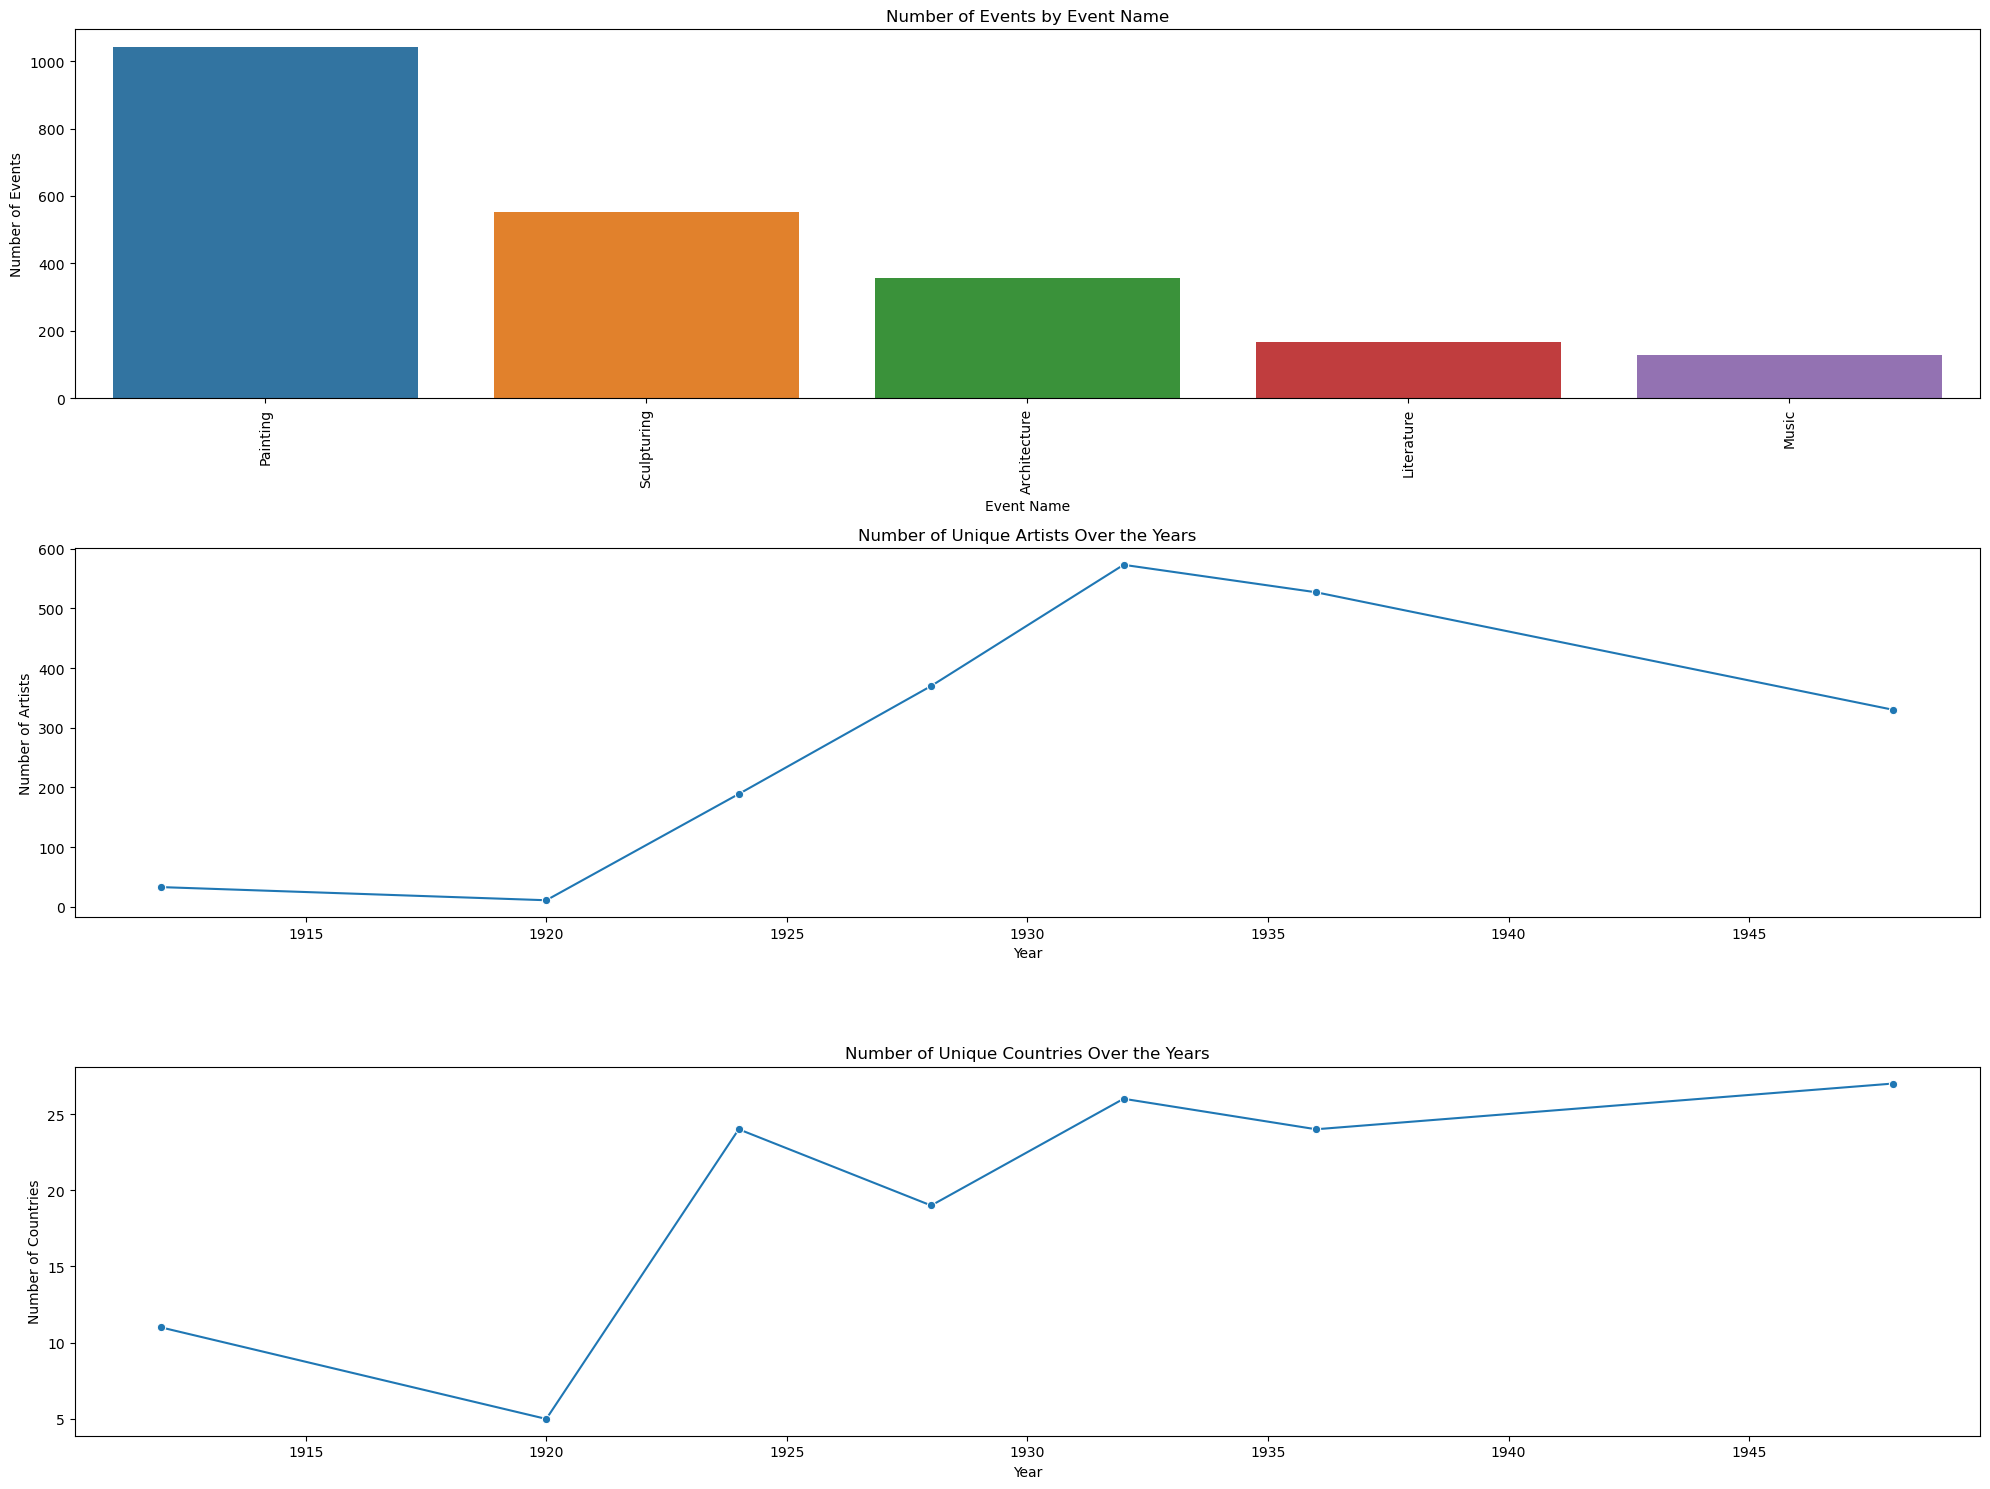

In [508]:
# Create a 3x1 subplot
fig, axs = plt.subplots(3, 1, figsize=[20, 15])

# Prepare data for the first plot
art_cat = art['event_name'].value_counts().reset_index()
art_cat.columns = ['event_name', 'count']  # Rename columns for clarity
art_cat = art_cat.sort_values(by='count', ascending=False)  # Sort by count

# Plotting the number of events per event name
sns.barplot(ax=axs[0], data=art_cat, x='event_name', y='count')
axs[0].set_title('Number of Events by Event Name')
axs[0].set_xlabel('Event Name')
axs[0].set_ylabel('Number of Events')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Prepare data for the second plot
artists_count_per_year = art.groupby('year')['name'].nunique().reset_index()
artists_count_per_year.columns = ['year', 'unique_artists']  # Rename columns for clarity

# Plotting the number of unique artists (countries) over the years
sns.lineplot(ax=axs[1], data=artists_count_per_year, x='year', y='unique_artists', marker='o')
axs[1].set_title('Number of Unique Artists Over the Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Artists')

# Prepare data for the third plot
artists_count_per_country = art.groupby('year')['country'].nunique().reset_index()
artists_count_per_country.columns = ['year', 'countries']  # Rename columns for clarity

# Plotting the number of unique countries (sports) over the years
sns.lineplot(ax=axs[2], data=artists_count_per_country, x='year', y='countries', marker='o')
axs[2].set_title('Number of Unique Countries Over the Years')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Number of Countries')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()